# Hopfield Network Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from alnum_dataset import generate_alnum_dataset
from hopfield import *

In [2]:
# Load dataset
X, y = generate_alnum_dataset()

print(f"Dataset shape: {X.shape}")
print(f"Data unique values: {np.unique(X)}")
print(f"Labels: {y}")

Dataset shape: (36, 28, 28)
Data unique values: [-1  1]
Labels: ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z' '0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [3]:
# Data preparation for Hopfield Network
X = X.reshape(X.shape[0], -1).astype(np.float32)
num_samples, num_features = X.shape

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

Number of samples: 36
Number of features: 784


In [13]:
# Initialize Hopfield Network
hopfield_net = HopfieldNetwork(n_neurons=num_features)

# Train Hopfield Network
hopfield_net.train_pseudoinverse_damped(X, lam=0.1)

# Chect stability of stored patterns
hopfield_net.check_stability(X)

[{'margin': -0.07932607330059974, 'stable': False},
 {'margin': -0.07933477931111402, 'stable': False},
 {'margin': -0.07922910280073807, 'stable': False},
 {'margin': -0.07897127431324841, 'stable': False},
 {'margin': -0.07921827068963495, 'stable': False},
 {'margin': -0.0, 'stable': False},
 {'margin': -0.07886759516154268, 'stable': False},
 {'margin': -0.07899340009617681, 'stable': False},
 {'margin': -0.07914779231712568, 'stable': False},
 {'margin': -0.07917882657983859, 'stable': False},
 {'margin': -0.07934127402182378, 'stable': False},
 {'margin': -0.07917693826342016, 'stable': False},
 {'margin': -0.07908145246850468, 'stable': False},
 {'margin': -0.0792412446855222, 'stable': False},
 {'margin': -0.079017685088745, 'stable': False},
 {'margin': -0.08013982791912472, 'stable': False},
 {'margin': -0.07926988817944325, 'stable': False},
 {'margin': -0.07909590390077434, 'stable': False},
 {'margin': -0.07915531906547357, 'stable': False},
 {'margin': -0.0791315020630331

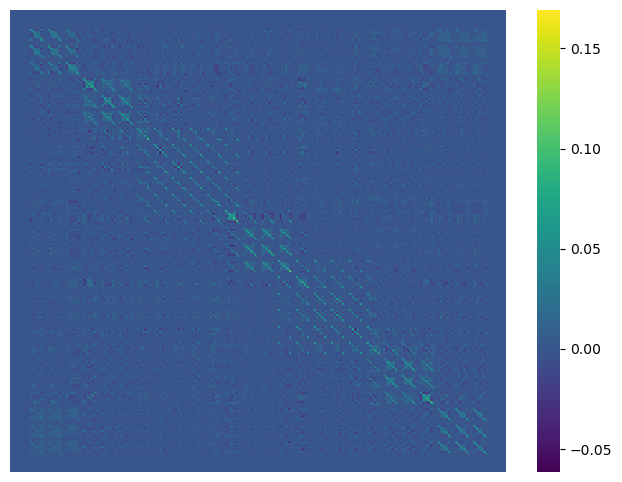

In [14]:
# Weights of the trained Hopfield Network
W = hopfield_net.get_weights()

# Plot the weight matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(W, cmap='viridis')

ax.set_xticks([])
ax.set_yticks([])
plt.show()

Converged after 2 iterations.


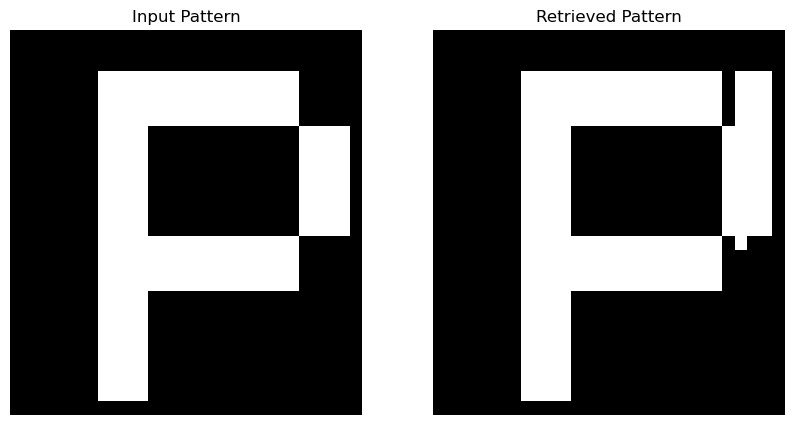

In [12]:
inp = X[15].copy()
out = hopfield_net.retrieve(inp, max_iterations=1000)

fix, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(inp.reshape(28,28), cmap='gray', cbar=False, ax=axs[0]) 
sns.heatmap(out.reshape(28,28), cmap='gray', cbar=False, ax=axs[1])
axs[0].set_title("Input Pattern")
axs[1].set_title("Retrieved Pattern")

for i in range(2):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()